In [1]:
%jsroot on
TFile *ipf = new TFile("root/bbhist.root");
TCanvas *c1 = new TCanvas;
c1->SetLogy(0);
gStyle->SetOptStat(0);

In [2]:
h2edt->Draw("colz");
c1->Draw();

In [3]:
Double_t lambda[4];
Double_t Pb[3];
Double_t Pn[2];

Pb[0] = 1;//母核的beta衰变分支比
//Pn[0] = 1-Pb[0];//母核的beta-n衰变分支比
Pb[1] = Pb[0];//beta子核的beta衰变分支比
//Pn[1] = 1-Pb[1];//beta子核的beta-n衰变分支比
//Pb[2] = Pb[0];//beta-n子核的beta衰变分支比

lambda[0]=log(2)/280;//beta子核的衰变常数
//lambda[1]=log(2)/1090;//beta-n子核的衰变常数
lambda[2]=log(2)/840;//beta孙子核的衰变常数
//lambda[3]=log(2)/1090;//beta-n子核的beta子核的衰变常数

In [4]:
TString s1 = "[0]+[1]*TMath::Exp(-x*log(2)/[2])";
TString s2, s5, s3, s61, s62;
s2.Form("+ [1] * %f * %f * (TMath::Exp(-log(2)/[2] * x) / (%f - log(2)/[2]) + TMath::Exp(-%f * x) / (log(2)/[2] - %f))",
        Pb[0], lambda[0], lambda[0], lambda[0], lambda[0]);
/*
s5.Form("+ [1] * %f * %f * (TMath::Exp(-log(2)/[2] * x) / (%f - log(2)/[2]) + TMath::Exp(-%f * x) / (log(2)/[2] - %f))",
        Pn[0], lambda[1], lambda[1], lambda[1], lambda[1]);
*/
s3.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
        Pb[0], Pb[1], lambda[0], lambda[2], lambda[0], lambda[2], lambda[0], lambda[0], lambda[2], lambda[0], lambda[2], lambda[2], lambda[0], lambda[2] );
/*
s61.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
         Pb[0], Pn[1], lambda[0], lambda[3], lambda[0], lambda[3], lambda[0], lambda[0], lambda[3], lambda[0], lambda[3], lambda[3], lambda[0], lambda[3]);
s62.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
         Pn[0], Pb[2], lambda[1], lambda[3], lambda[1], lambda[3], lambda[1], lambda[1], lambda[3], lambda[1], lambda[3], lambda[3], lambda[1], lambda[3]);
*/

In [5]:
TF1 *f1 = new TF1("f1",s1+s2+s3,0,4000);  // parameter [2] is T1/2
f1->SetNpx(3000);

In [6]:
Int_t e,e1,e2;  // gate (e1,e2), name e
vector<int> b;  // background bin

In [7]:
void gate() // nbin: decaytime's bin; xmax: fit range (0,xmax)
{
    h2edt->ProjectionY(Form("h%d",e),e1+1,e2+1);
    TH1F *hdt = (TH1F*)gROOT->FindObject(Form("h%d",e));
    TH1F *hbg = new TH1F(Form("hbg%d",e),"hbg",h2edt->GetYaxis()->GetNbins(),0,h2edt->GetYaxis()->GetXmax());
    for (unsigned int i=0; i<b.size(); i++){
        h2edt->ProjectionY(Form("b%d",b[i]),b[i]+1,b[i]+1);
        TH1F *hbtemp = (TH1F*)gROOT->FindObject(Form("b%d",b[i]));
        hbg->Add(hbg,hbtemp,1,1);
    }
    double weight = (double)(e2-e1+1)/b.size();
    hdt->Add(hdt,hbg,1,-weight);
    
    f1->SetParameter(0,50);
    f1->SetParameter(1,100);
    f1->SetParameter(2,50);
    hdt->Fit("f1","R");
    hdt->Draw();
    c1->Draw();
    delete hbg;
}

In [8]:
h2edt->ProjectionX("tpjx");
tpjx->Draw();
c1->Draw();

In [9]:
%jsroot off
c1->SetLogy(0);

## gate 200 keV

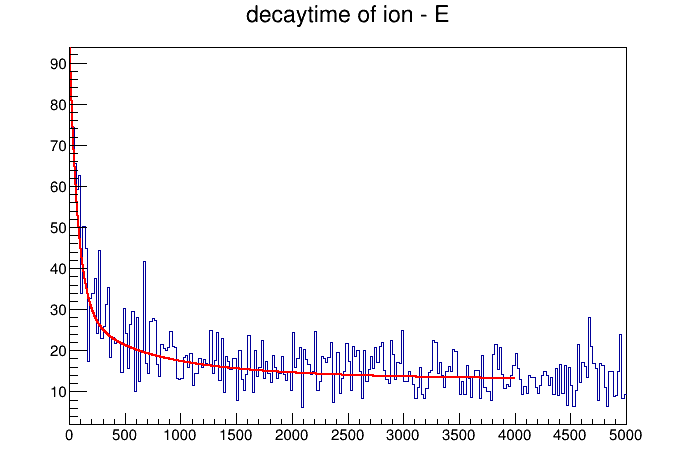

 FCN=279.378 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=1.16782e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.29757e+01   3.32907e-01   2.30396e-03   1.34754e-03
   2  p1           8.53834e+01   8.87126e+00   3.28292e-02  -1.92142e-05
   3  p2           5.12507e+01   5.47974e+00   1.96076e-02  -3.17176e-06


In [10]:
e = 200;
e1 = 199;
e2 = 201;
b = {185,186,187,188,189,190,191,192,193,194,204,205,206,207,208,209,210,211,212,213};
gate();

## gate 527 keV 

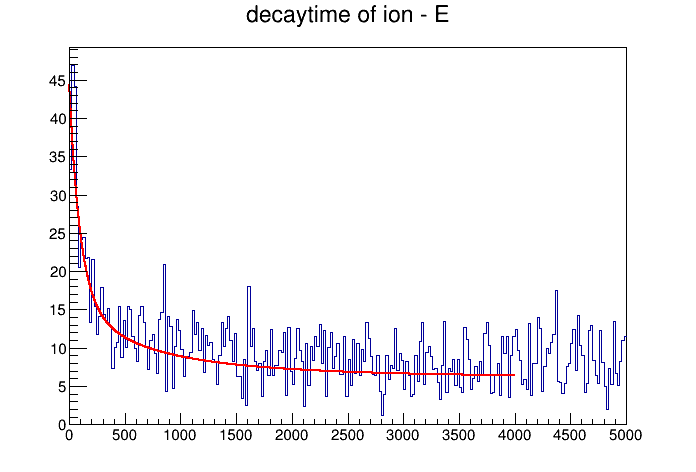

 FCN=254.282 FROM MIGRAD    STATUS=CONVERGED     102 CALLS         103 TOTAL
                     EDM=9.81006e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.23273e+00   2.37710e-01   1.54887e-03  -1.55902e-04
   2  p1           3.84513e+01   5.06658e+00   1.80010e-02  -9.28393e-05
   3  p2           6.61331e+01   8.98022e+00   3.07209e-02  -8.77530e-05


In [11]:
e = 527;
e1 = 526;
e2 = 528;
b = {514,515,516,517,518,519,520,521,522,523,531,532,533,534,535,536,537,538,539,540};
gate();

## gate 1325 keV

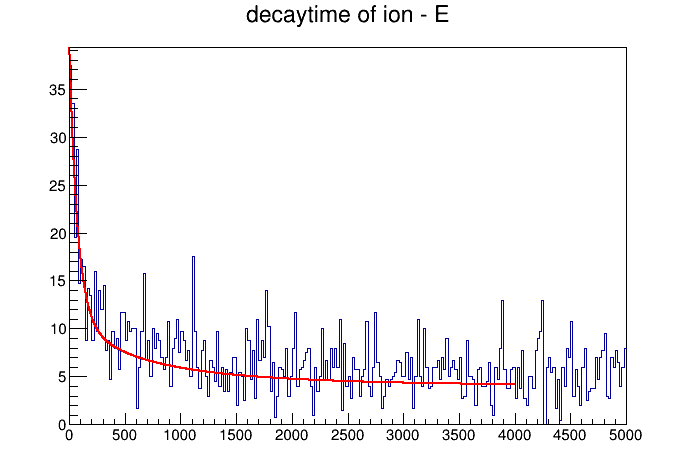

 FCN=255.729 FROM MIGRAD    STATUS=CONVERGED     126 CALLS         127 TOTAL
                     EDM=8.54207e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.06399e+00   1.90683e-01   1.26066e-03   4.62559e-04
   2  p1           3.61279e+01   6.30833e+00   1.94952e-02  -1.10701e-05
   3  p2           5.04985e+01   9.15636e+00   2.73515e-02  -1.29223e-05


In [12]:
e = 1325;
e1 = 1324;
e2 = 1328;
b = {1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341};
gate();

## gate 200+527+1325 keV

In [13]:
f1->SetParameter(0,50);
f1->SetParameter(1,100);
f1->SetParameter(2,50);

h200->Add(h200,h527,1,1);
h200->Add(h200,h1325,1,1);
h200->Fit("f1","R");

 FCN=246.222 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=3.03822e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.59547e+01   4.72877e-01   3.06142e-03   4.74904e-04
   2  p1           1.58322e+02   1.16155e+01   4.04077e-02   2.81851e-05
   3  p2           5.54226e+01   4.20721e+00   1.41265e-02  -9.86789e-05


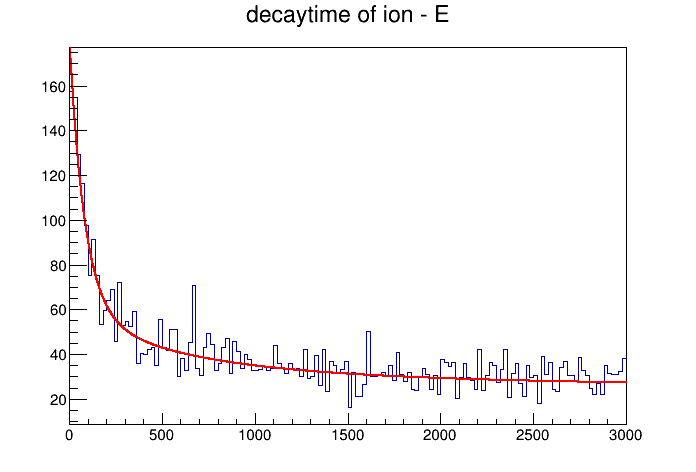

In [14]:
h200->GetXaxis()->SetRangeUser(0,3000);
h200->Draw();
c1->Draw();

In [15]:
ofstream ofs2("spectra/t128Ag9-.txt");
nbin = 250;
for (int ibin=1; ibin<=nbin; ibin++){
    ofs2<<h200->GetBinLowEdge(ibin) + h200->GetBinWidth(ibin)/2.<<'\n';
}
ofs2<<"////////////////////////////////////////////////////////////////////////////////////////////////////////"<<'\n';
for (int ibin=1; ibin<=nbin; ibin++){
    ofs2<<h200->GetBinContent(ibin)<<'\n';
}
ofs2<<"////////////////////////////////////////////////////////////////////////////////////////////////////////"<<'\n';
for (int ibin=1; ibin<=nbin; ibin++){
    ofs2<<h200->GetBinError(ibin)<<'\n';
}
ofs2.close();